Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB

First 5 Rows of Dataset:
    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0     

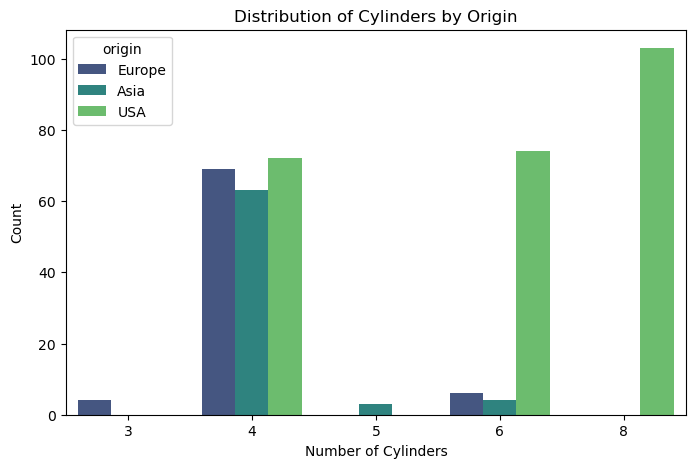

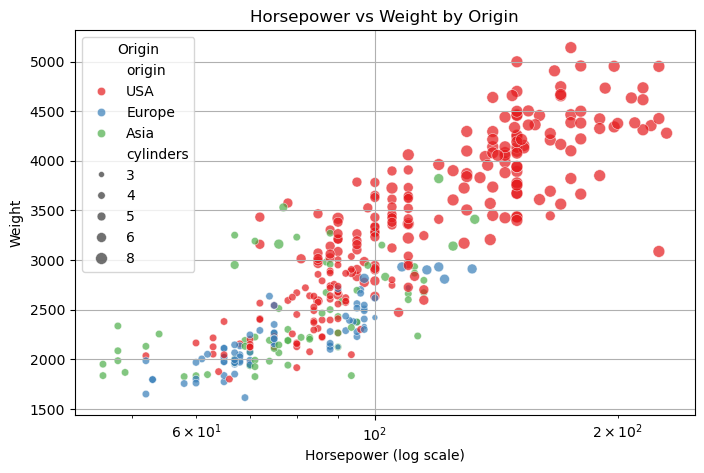

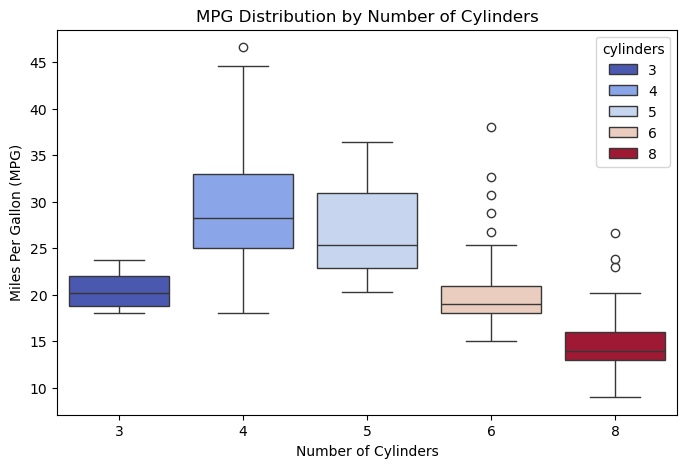

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('auto-mpg.data', sep=r'\s+', header=None)


column_names = [
    'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
    'acceleration', 'model_year', 'origin', 'car_name'
]
df.columns = column_names


print("Dataset Information:")
df.info()


print("\nFirst 5 Rows of Dataset:")
print(df.head())


df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')


print("\nMissing values in 'horsepower' before filling:")
print(df['horsepower'].isnull().sum())


df['horsepower'] = df['horsepower'].fillna(df['horsepower'].astype(float).median())


print("\nData Types After Conversion:")
df.info()


print("\nUnique values in 'origin' before replacing:")
print(df['origin'].unique())

df['origin'] = df['origin'].replace({1: 'USA', 2: 'Asia', 3: 'Europe'})


print("\nUnique values in 'origin' after replacing:")
print(df['origin'].unique())


print("\nSummary Statistics:")
print(df.describe())


df.to_csv('cleaned_auto_mpg.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_auto_mpg.csv'")


plt.figure(figsize=(8, 5))
sns.countplot(x='cylinders', data=df, hue='origin', palette='viridis')
plt.xlabel("Number of Cylinders")
plt.ylabel("Count")
plt.title("Distribution of Cylinders by Origin")
plt.show()


plt.figure(figsize=(8, 5))
sns.scatterplot(x='horsepower', y='weight', data=df, hue='origin', size='cylinders', palette='Set1', alpha=0.7)
plt.xscale('log')  
plt.xlabel("Horsepower (log scale)")
plt.ylabel("Weight")
plt.title("Horsepower vs Weight by Origin")
plt.grid(True)
plt.legend(title='Origin')
plt.show()



plt.figure(figsize=(8, 5))
sns.boxplot(x='cylinders', y='mpg', data=df, hue='cylinders', palette='coolwarm')
plt.xlabel("Number of Cylinders")
plt.ylabel("Miles Per Gallon (MPG)")
plt.title("MPG Distribution by Number of Cylinders")
plt.show()